In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/janakimeena/Machine-Learning-Lab/master/Ex6/heart_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.drop(['fbs'], axis=1)

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,1,115,1,1.2,1,1,3,0


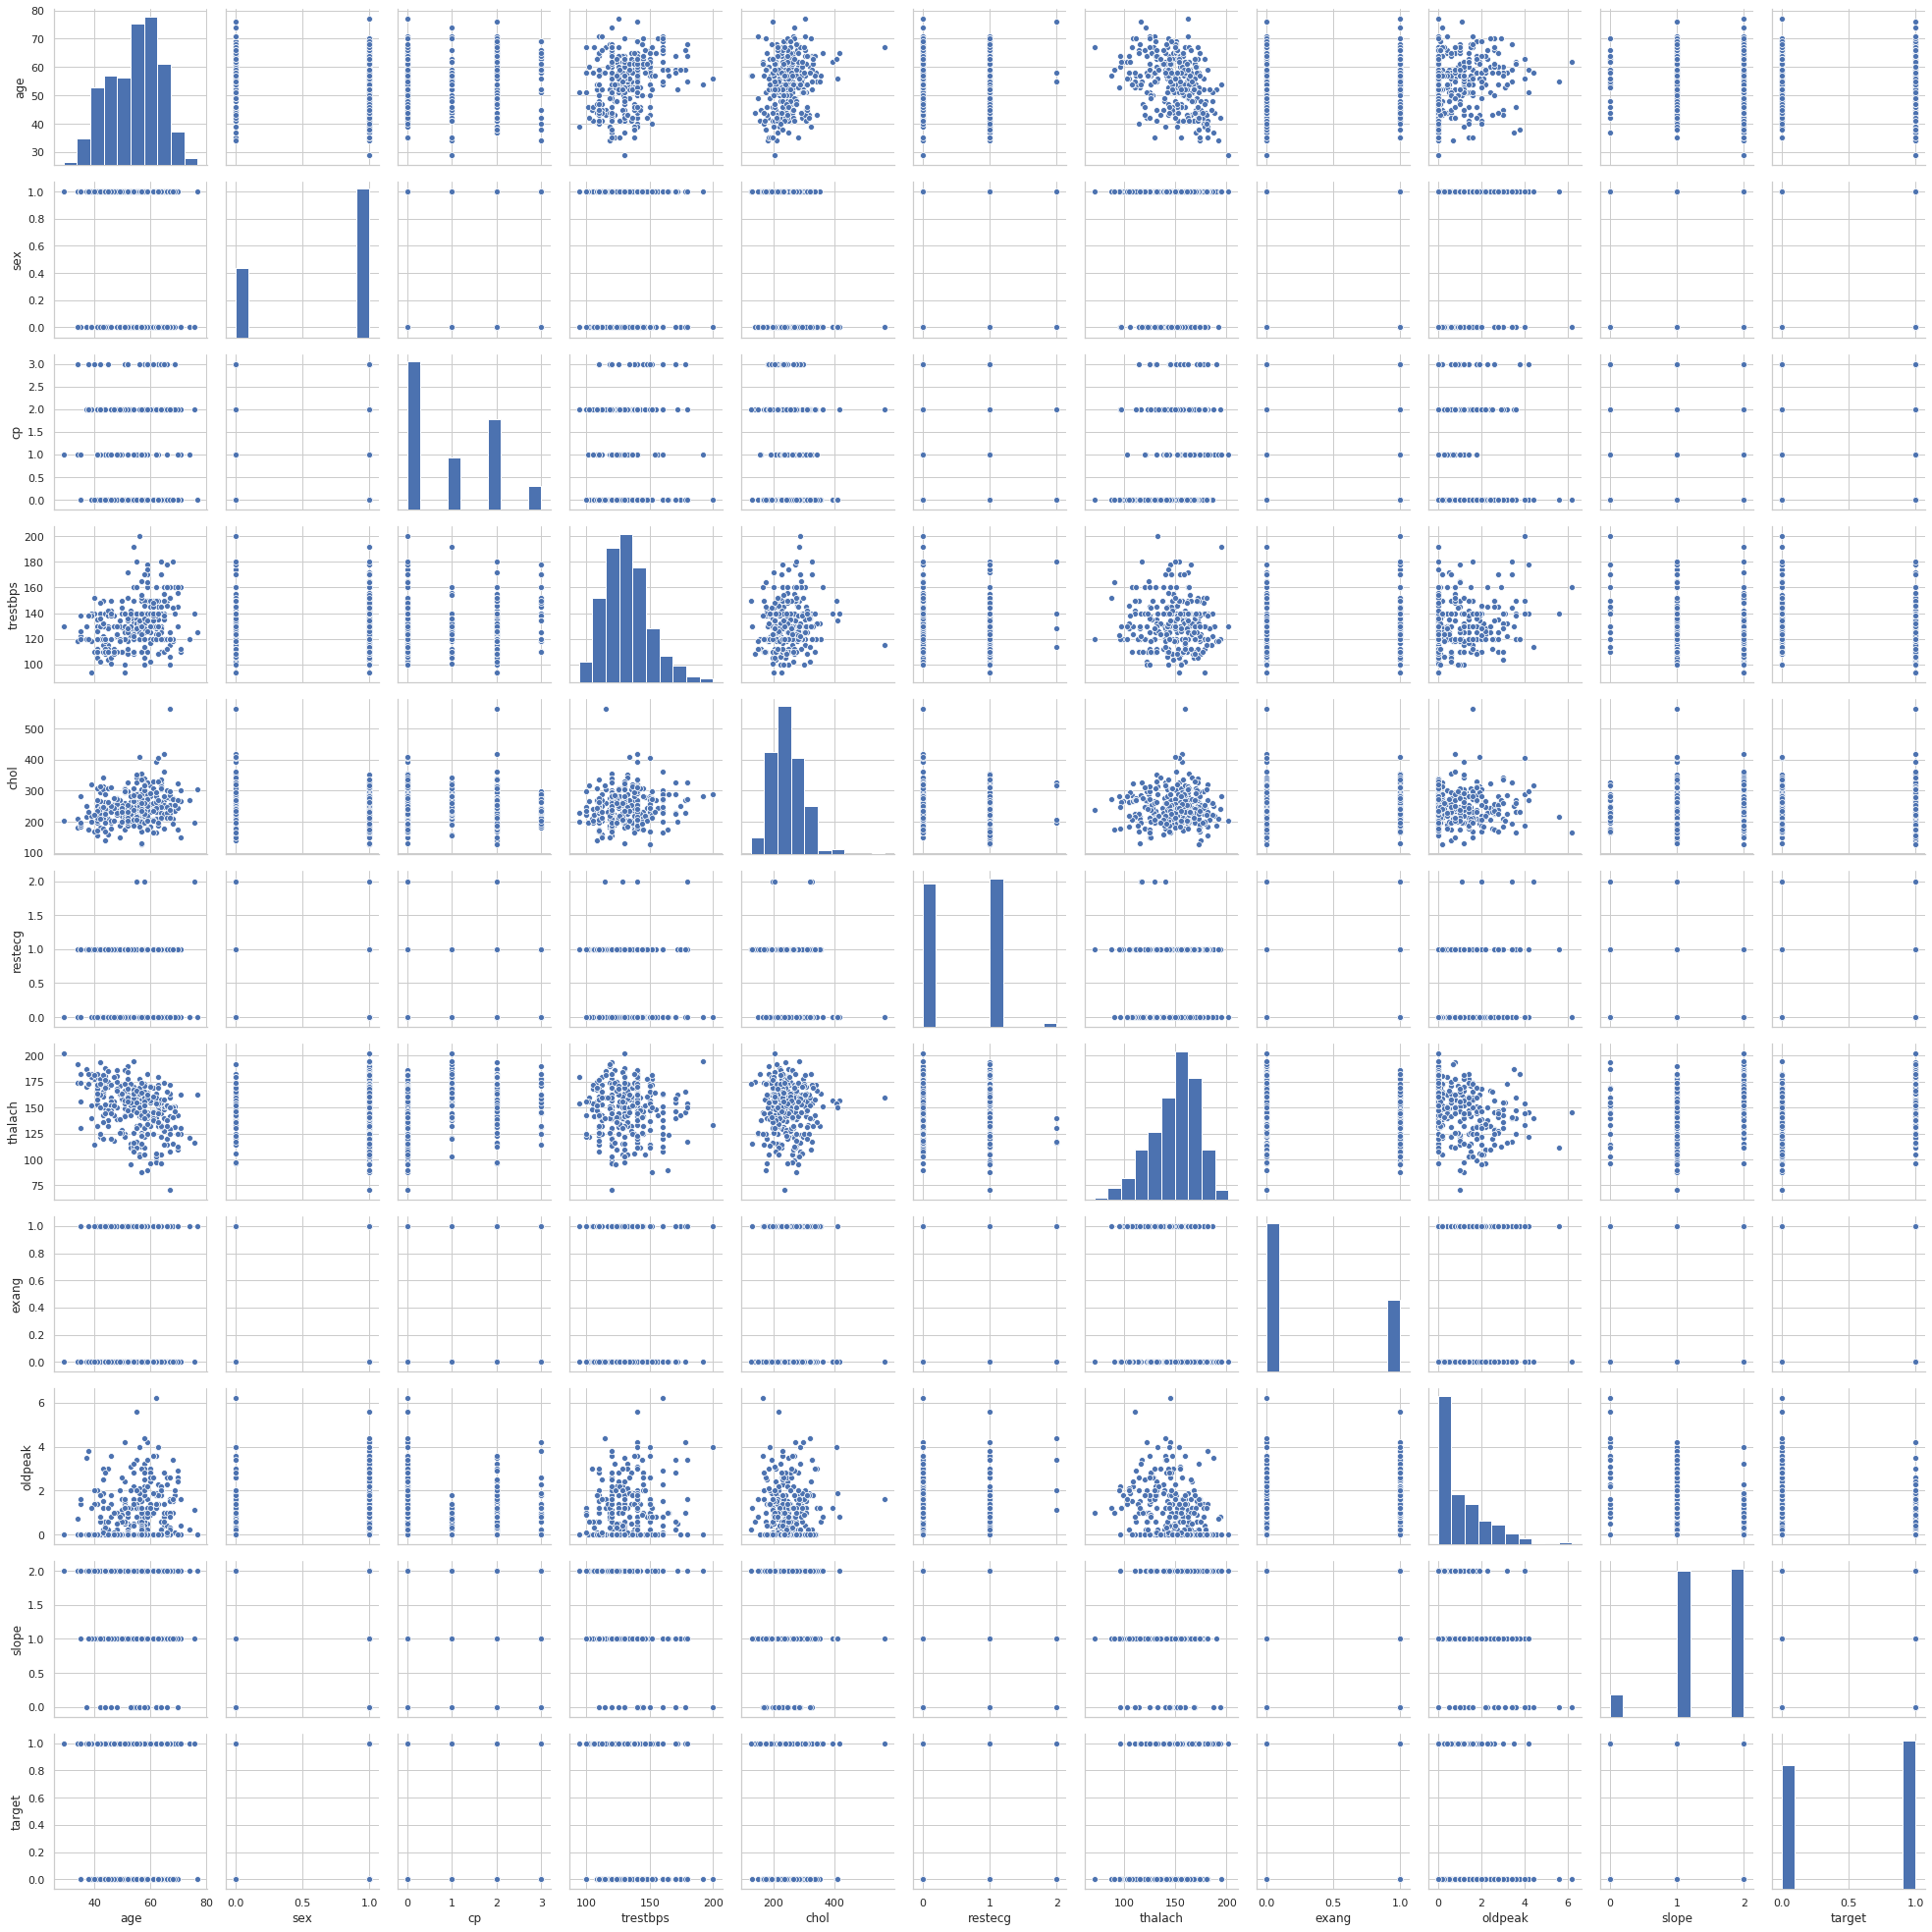

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ['age','sex','cp','trestbps','chol','restecg','thalach','exang','oldpeak','slope','target']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

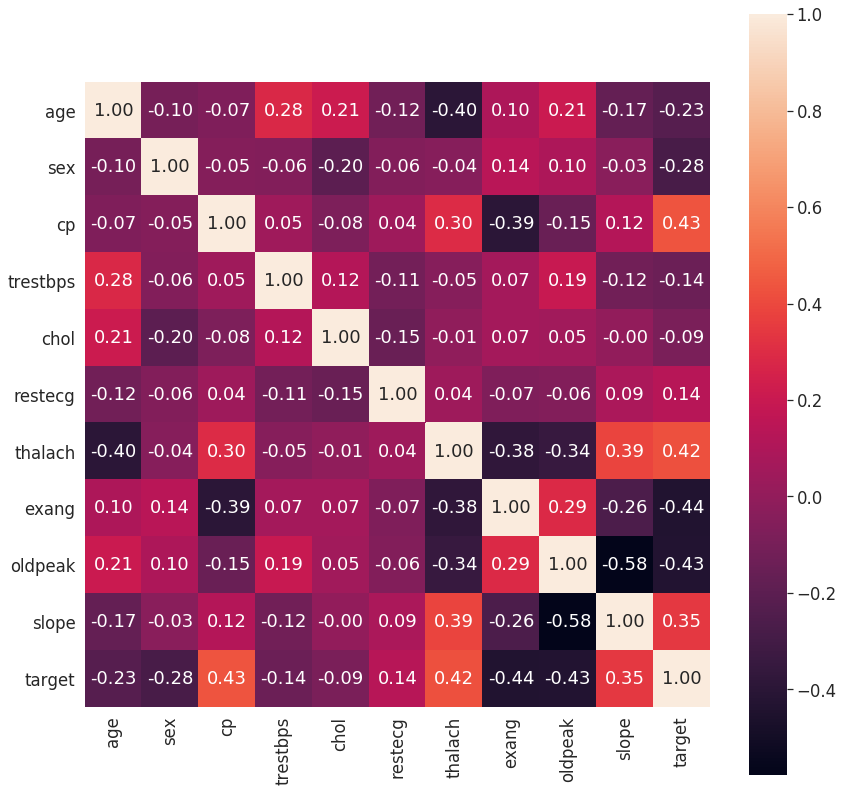

In [ ]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(14,14))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

In [ ]:
array =df.values
#X = array[:,[7,9]]
X = df.drop(['age','trestbps','chol','fbs','restecg'],axis=1)
Y = array[:, [13]]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.predict_proba(X_test_std)

array([[9.99987261e-01, 1.27389978e-05],
       [2.58931041e-05, 9.99974107e-01],
       [9.99810982e-01, 1.89017769e-04],
       [9.99989912e-01, 1.00880644e-05],
       [1.91055390e-04, 9.99808945e-01],
       [9.99933362e-01, 6.66382278e-05],
       [9.99985583e-01, 1.44166335e-05],
       [9.99972255e-01, 2.77447778e-05],
       [9.99990933e-01, 9.06663257e-06],
       [9.99994042e-01, 5.95810014e-06],
       [3.74430098e-05, 9.99962557e-01],
       [1.68772430e-05, 9.99983123e-01],
       [9.99985421e-01, 1.45787869e-05],
       [2.95204098e-05, 9.99970480e-01],
       [1.55558844e-05, 9.99984444e-01],
       [6.02325259e-05, 9.99939767e-01],
       [2.09715424e-04, 9.99790285e-01],
       [3.70040412e-05, 9.99962996e-01],
       [9.99994094e-01, 5.90600102e-06],
       [2.70785931e-05, 9.99972921e-01],
       [3.20573087e-05, 9.99967943e-01],
       [9.99959241e-01, 4.07585315e-05],
       [9.99975531e-01, 2.44685704e-05],
       [9.99976675e-01, 2.33250501e-05],
       [2.970875

In [ ]:
Y_pred = lr.predict(X_test_std)

In [ ]:
from sklearn.metrics import accuracy_score

print('Accurcay: %.2f' % accuracy_score(Y_test,Y_pred))

Accurcay: 1.00
